<a href="https://colab.research.google.com/github/jhkang0516/Mogakso/blob/main/%ED%83%80%EC%9D%B4%ED%83%80%EB%8B%89.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. 라이브러리 불러오기

In [1]:
import os

# Data Analysis
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Data Visualization
import seaborn as sns
import missingno as msno

import warnings

# seaborn의 font scale을 사용하여 graph의 font size를 지정합니다.
plt.style.use('seaborn')
sns.set(font_scale=2.5)

# ignore warnings
warnings.filterwarnings('ignore')

# 브라우저의 내부에 plot을 그릴 수 있도록 설정합니다.
%matplotlib inline

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

from sklearn import metrics
from sklearn.model_selection import train_test_split

<ipython-input-1-e270faed7912>:15: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


# 2. 데이터

In [2]:
from google.colab import drive
drive.mount('/content/drive')
# 데이터를 우선 가져와야합니다.
train = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/titanic/train.csv")
test = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/titanic/test.csv")

# 데이터 미리보기
train.head()

Mounted at /content/drive


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
train.info()
print('-'*20)
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
--------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    

## 결측값 확인하기
아래 보면, 흰색으로 표시된 값들이 결측값이다.     
나이는 당연히 중간 중간 빈 값들 존재 가능

<Axes: >

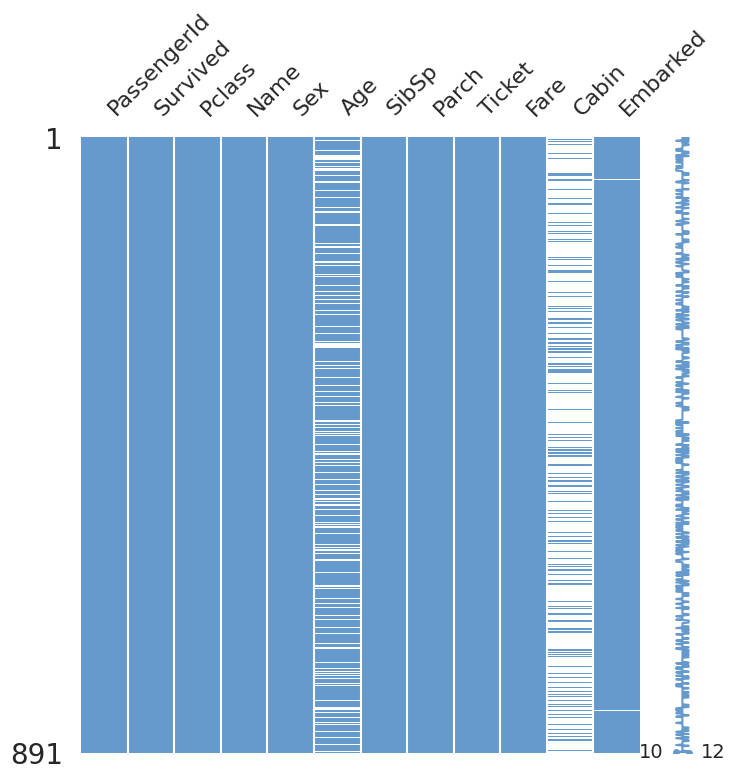

In [ ]:
msno.matrix(df=train.iloc[:, :], figsize=(8, 8), color=(0.4, 0.6, 0.8))

<Axes: >

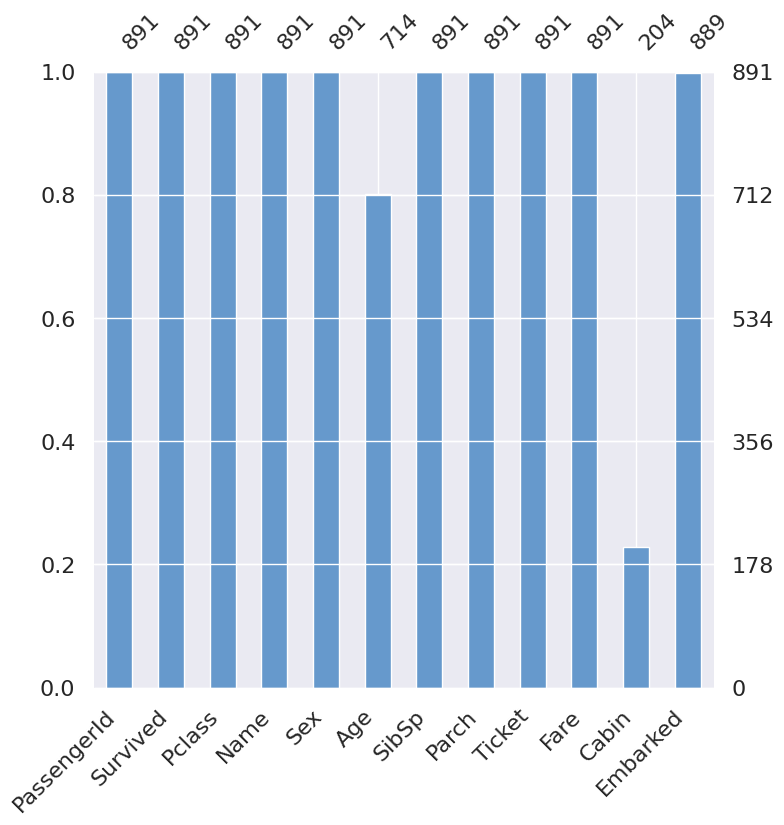

In [ ]:
msno.bar(df=train.iloc[:, :], figsize=(8, 8), color=(0.4, 0.6, 0.8))

null값 존재 X
위에서 바로 보면, 결측치가 age에는 1/5 정도 존재하고 cabin은 결측치가 아닌 값이 1/5존재

In [ ]:
train.isnull().sum()
# 이렇게도 결측치 확인 가능

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [3]:
train = train.drop(['PassengerId', 'Name', 'Ticket'], axis=1)
test = test.drop(['Name','Ticket'], axis=1)

3가지 요소는 확실히 생존자 예측에 전혀 관계 없으므로 삭제 ,   
axis = 1은 열을 기준으로 삭제해준다.

In [4]:
train.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


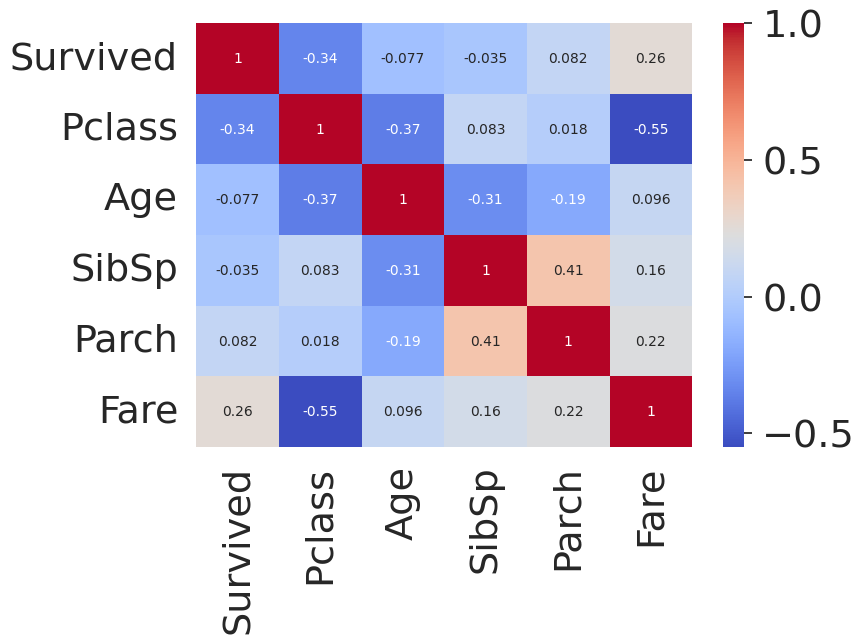

In [ ]:
sns.heatmap(train.corr(), cmap='coolwarm', annot_kws={"size": 10},annot=True)
plt.show()

info를 보면, object변수들, 즉 데이터가 문자인 변수가 존재한다.    
그러므로 숫자화를 해야한다.

## 3. 데이터 하나하나 처리하기    
1. Pclass   
2. Sex   
3. Age      
4.SibSp     
5. Parch      
6. Fare     
7. Cabin     
8. Embarked       

In [5]:
train['Pclass'].value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

여기서 1,2,3등급은 숫자로는 연속적일 수 있지만, 실제 품질 차이 등에서 연속적이진 않기 때문에 이를 범주형 데이트로 취급해야 한다.    
one-hot encoding을 사용하여 이를 표현할 수 있다.    

In [6]:
pd.get_dummies(train, columns = ['Sex'], drop_first = True)

,Survived,Pclass,Age,SibSp,Parch,Fare,Cabin,Embarked,Sex_male
0,0,3,22.0,1,0,7.2500,NaN,S,1
1,1,1,38.0,1,0,71.2833,C85,C,0
2,1,3,26.0,0,0,7.9250,NaN,S,0
3,1,1,35.0,1,0,53.1000,C123,S,0
4,0,3,35.0,0,0,8.0500,NaN,S,1
...,...,...,...,...,...,...,...,...,...
886,0,2,27.0,0,0,13.0000,NaN,S,1
887,1,1,19.0,0,0,30.0000,B42,S,0
888,0,3,NaN,1,2,23.4500,NaN,S,0
889,1,1,26.0,0,0,30.0000,C148,C,1


In [7]:
train_dummies = pd.get_dummies(train, columns=['Sex'])

In [8]:
train_dummies

,Survived,Pclass,Age,SibSp,Parch,Fare,Cabin,Embarked,Sex_female,Sex_male
0,0,3,22.0,1,0,7.2500,NaN,S,0,1
1,1,1,38.0,1,0,71.2833,C85,C,1,0
2,1,3,26.0,0,0,7.9250,NaN,S,1,0
3,1,1,35.0,1,0,53.1000,C123,S,1,0
4,0,3,35.0,0,0,8.0500,NaN,S,0,1
...,...,...,...,...,...,...,...,...,...,...
886,0,2,27.0,0,0,13.0000,NaN,S,0,1
887,1,1,19.0,0,0,30.0000,B42,S,1,0
888,0,3,NaN,1,2,23.4500,NaN,S,1,0
889,1,1,26.0,0,0,30.0000,C148,C,0,1


In [9]:
test_dummies = pd.get_dummies(test, columns=['Sex'])

In [ ]:
test_dummies

,PassengerId,Pclass,Age,SibSp,Parch,Fare,Cabin,Embarked,Sex_female,Sex_male
0,892,3,34.5,0,0,7.8292,NaN,Q,0,1
1,893,3,47.0,1,0,7.0000,NaN,S,1,0
2,894,2,62.0,0,0,9.6875,NaN,Q,0,1
3,895,3,27.0,0,0,8.6625,NaN,S,0,1
4,896,3,22.0,1,1,12.2875,NaN,S,1,0
...,...,...,...,...,...,...,...,...,...,...
413,1305,3,NaN,0,0,8.0500,NaN,S,0,1
414,1306,1,39.0,0,0,108.9000,C105,C,1,0
415,1307,3,38.5,0,0,7.2500,NaN,S,0,1
416,1308,3,NaN,0,0,8.0500,NaN,S,0,1


In [ ]:
train['Pclass'].value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

In [10]:
train_dummies = pd.get_dummies(train_dummies, columns=['Pclass'])

In [11]:
train_dummies

,Survived,Age,SibSp,Parch,Fare,Cabin,Embarked,Sex_female,Sex_male,Pclass_1,Pclass_2,Pclass_3
0,0,22.0,1,0,7.2500,NaN,S,0,1,0,0,1
1,1,38.0,1,0,71.2833,C85,C,1,0,1,0,0
2,1,26.0,0,0,7.9250,NaN,S,1,0,0,0,1
3,1,35.0,1,0,53.1000,C123,S,1,0,1,0,0
4,0,35.0,0,0,8.0500,NaN,S,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,27.0,0,0,13.0000,NaN,S,0,1,0,1,0
887,1,19.0,0,0,30.0000,B42,S,1,0,1,0,0
888,0,NaN,1,2,23.4500,NaN,S,1,0,0,0,1
889,1,26.0,0,0,30.0000,C148,C,0,1,1,0,0


In [12]:
test_dummies= pd.get_dummies(test_dummies, columns=['Pclass'])

In [13]:
train_dummies["Age"].fillna(train_dummies["Age"].mean(), inplace=True)

In [14]:
test_dummies["Age"].fillna(test_dummies["Age"].mean(),inplace=True)

In [18]:
test_dummies.fillna(0,inplace=True)

In [23]:
train_dummies=train_dummies.drop('Cabin',axis=1)
test_dummies=test_dummies.drop('Cabin',axis=1)

In [27]:
train_dummies['Embarked'].fillna('S',inplace=True)

In [28]:
train_dummies = pd.get_dummies(train_dummies, columns=['Embarked'])
test_dummies = pd.get_dummies(test_dummies, columns=['Embarked'])

In [29]:
train_dummies

,Survived,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Pclass_1,Pclass_2,Pclass_3,Embarked_C,Embarked_Q,Embarked_S
0,0,22.000000,1,0,7.2500,0,1,0,0,1,0,0,1
1,1,38.000000,1,0,71.2833,1,0,1,0,0,1,0,0
2,1,26.000000,0,0,7.9250,1,0,0,0,1,0,0,1
3,1,35.000000,1,0,53.1000,1,0,1,0,0,0,0,1
4,0,35.000000,0,0,8.0500,0,1,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,27.000000,0,0,13.0000,0,1,0,1,0,0,0,1
887,1,19.000000,0,0,30.0000,1,0,1,0,0,0,0,1
888,0,29.699118,1,2,23.4500,1,0,0,0,1,0,0,1
889,1,26.000000,0,0,30.0000,0,1,1,0,0,1,0,0


In [30]:
test_dummies

,PassengerId,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Pclass_1,Pclass_2,Pclass_3,Embarked_C,Embarked_Q,Embarked_S
0,892,34.50000,0,0,7.8292,0,1,0,0,1,0,1,0
1,893,47.00000,1,0,7.0000,1,0,0,0,1,0,0,1
2,894,62.00000,0,0,9.6875,0,1,0,1,0,0,1,0
3,895,27.00000,0,0,8.6625,0,1,0,0,1,0,0,1
4,896,22.00000,1,1,12.2875,1,0,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,30.27259,0,0,8.0500,0,1,0,0,1,0,0,1
414,1306,39.00000,0,0,108.9000,1,0,1,0,0,1,0,0
415,1307,38.50000,0,0,7.2500,0,1,0,0,1,0,0,1
416,1308,30.27259,0,0,8.0500,0,1,0,0,1,0,0,1


In [31]:
X_train=train_dummies.drop("Survived",axis=1)
Y_train=train_dummies['Survived']
X_test=test_dummies.drop("PassengerId",axis=1)

In [33]:
random_forest=RandomForestClassifier(n_estimators=100)
random_forest.fit(X_train,Y_train)
Y_pred=random_forest.predict(X_test)
random_forest.score(X_train,Y_train)

submission=pd.DataFrame({
    "PassengerId" : test_dummies['PassengerId'],
    "Survived":Y_pred
})
submission.to_csv('submission.csv',index=False)

출처 : https://happy-jihye.github.io/kaggle/kaggle-1/       
데싸노트의 실전에서 통하는 머신러닝   
https://www.kaggle.com/code/subinium/subinium-tutorial-titanic-beginner